<a href="https://colab.research.google.com/github/Lyv24/Tareas_THC/blob/main/Proyecto2_THC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO \\
FACULTAD DE CIENCIAS \\
***El Ébola en Liberia*** \\
***PROYECTO FINAL: ANÁLISIS NÚMERICO*** \\
*Taller de Herramientas Computacionales* \\
Integrantes: \\
Cruz Contreras Isari Lyvier \\
Velázquez Perea Miranda \\


In [ ]:
!pip install skforecast

In [1]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post11-py3-none-any.whl size=2959 sha256=62b2fb4ac1b275fc54838907871fbdb0da950faa3916fad124df7fda43535bc0
  Stored in directory: /root/.cache/pip/wheels/aa/9c/60/f67813603a52fc35057868f1aba0003cc75b72583dcaa2c341
Successfully built sklearn


In [2]:
#Primero saquemos la tabla general de los datos para todos los países
import pandas as pd
import matplotlib.pyplot as plt
link = "https://github.com/seismomat/HerramientasComputacionales/blob/main/Aplicaciones/ebola_outbreak_dataset-master/ebola_outbreak_dataset-master/ebola_2014_2016_clean.csv"

code = "?raw=true"
url = link+code
df = pd.read_csv(url,sep=",",index_col=1)

In [3]:
df

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
29/08/2014,Guinea,482,287.0,289.2,192.8,86.76,57.84,173.52,115.68,28.92,19.28
29/08/2014,Nigeria,15,6.0,9.0,6.0,2.70,1.80,5.40,3.60,0.90,0.60
29/08/2014,Sierra Leone,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40
29/08/2014,Liberia,322,225.0,193.2,128.8,57.96,38.64,115.92,77.28,19.32,12.88
05/09/2014,Guinea,604,362.0,362.4,241.6,108.72,72.48,217.44,144.96,36.24,24.16
...,...,...,...,...,...,...,...,...,...,...,...
23/03/2016,Liberia,3151,NaN,1890.6,1260.4,567.18,378.12,1134.36,756.24,189.06,126.04
23/03/2016,Italy,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
23/03/2016,Liberia,2,1.0,1.2,0.8,0.36,0.24,0.72,0.48,0.12,0.08


In [4]:
#Ahora nos enfocaremos solamente en los de Liberia, para eso nos tomaremos la columna de países y tomaremos en cuenta solo las de Liberia como se
#ve a continuación
L = df[df["Country"]=="Liberia"]
L

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
29/08/2014,Liberia,322,225.0,193.2,128.8,57.96,38.64,115.92,77.28,19.32,12.88
05/09/2014,Liberia,614,431.0,368.4,245.6,110.52,73.68,221.04,147.36,36.84,24.56
08/09/2014,Liberia,634,508.0,380.4,253.6,114.12,76.08,228.24,152.16,38.04,25.36
12/09/2014,Liberia,654,498.0,392.4,261.6,117.72,78.48,235.44,156.96,39.24,26.16
16/09/2014,Liberia,790,563.0,474.0,316.0,142.20,94.80,284.40,189.60,47.40,31.60
...,...,...,...,...,...,...,...,...,...,...,...
29/12/2015,Liberia,3151,NaN,1890.6,1260.4,567.18,378.12,1134.36,756.24,189.06,126.04
29/12/2015,Liberia,9,3.0,5.4,3.6,1.62,1.08,3.24,2.16,0.54,0.36
23/03/2016,Liberia,9,3.0,5.4,3.6,1.62,1.08,3.24,2.16,0.54,0.36


In [5]:
#Ahora vemos la tabla en donde observaremos los datos faltantes, si dice False es que no falta el dato, si dice True es que si falta el dato
L.isnull()

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
29/08/2014,False,False,False,False,False,False,False,False,False,False,False
05/09/2014,False,False,False,False,False,False,False,False,False,False,False
08/09/2014,False,False,False,False,False,False,False,False,False,False,False
12/09/2014,False,False,False,False,False,False,False,False,False,False,False
16/09/2014,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
29/12/2015,False,False,True,False,False,False,False,False,False,False,False
29/12/2015,False,False,False,False,False,False,False,False,False,False,False
23/03/2016,False,False,False,False,False,False,False,False,False,False,False


In [6]:
#Ahora de esta manera veremos en que columna están los datos faltantes y cuántos de ellos son
L.isnull().sum()

Country                      0
No. of confirmed cases       0
No. of confirmed deaths    239
Male Cases                   0
Female Cases                 0
Boys                         0
Girls                        0
Adult Male                   0
Adult Female                 0
Old Male                     0
Old Female                   0
dtype: int64

In [7]:
#Para rellenar estos datos faltantes sacaremos el promedio de la siguiente manera
promedio=L["No. of confirmed deaths"].mean()
promedio

215.496

In [8]:
#Ya que tenemos el promedio ahora sustituimos los datos faltantes por el promedio
L.fillna(promedio,inplace=True)

<ipython-input-8-47513ba664a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L.fillna(promedio,inplace=True)


In [9]:
#De esta manera notemos que ya no nos marca ningún dato faltante
L.isnull().sum()

Country                    0
No. of confirmed cases     0
No. of confirmed deaths    0
Male Cases                 0
Female Cases               0
Boys                       0
Girls                      0
Adult Male                 0
Adult Female               0
Old Male                   0
Old Female                 0
dtype: int64

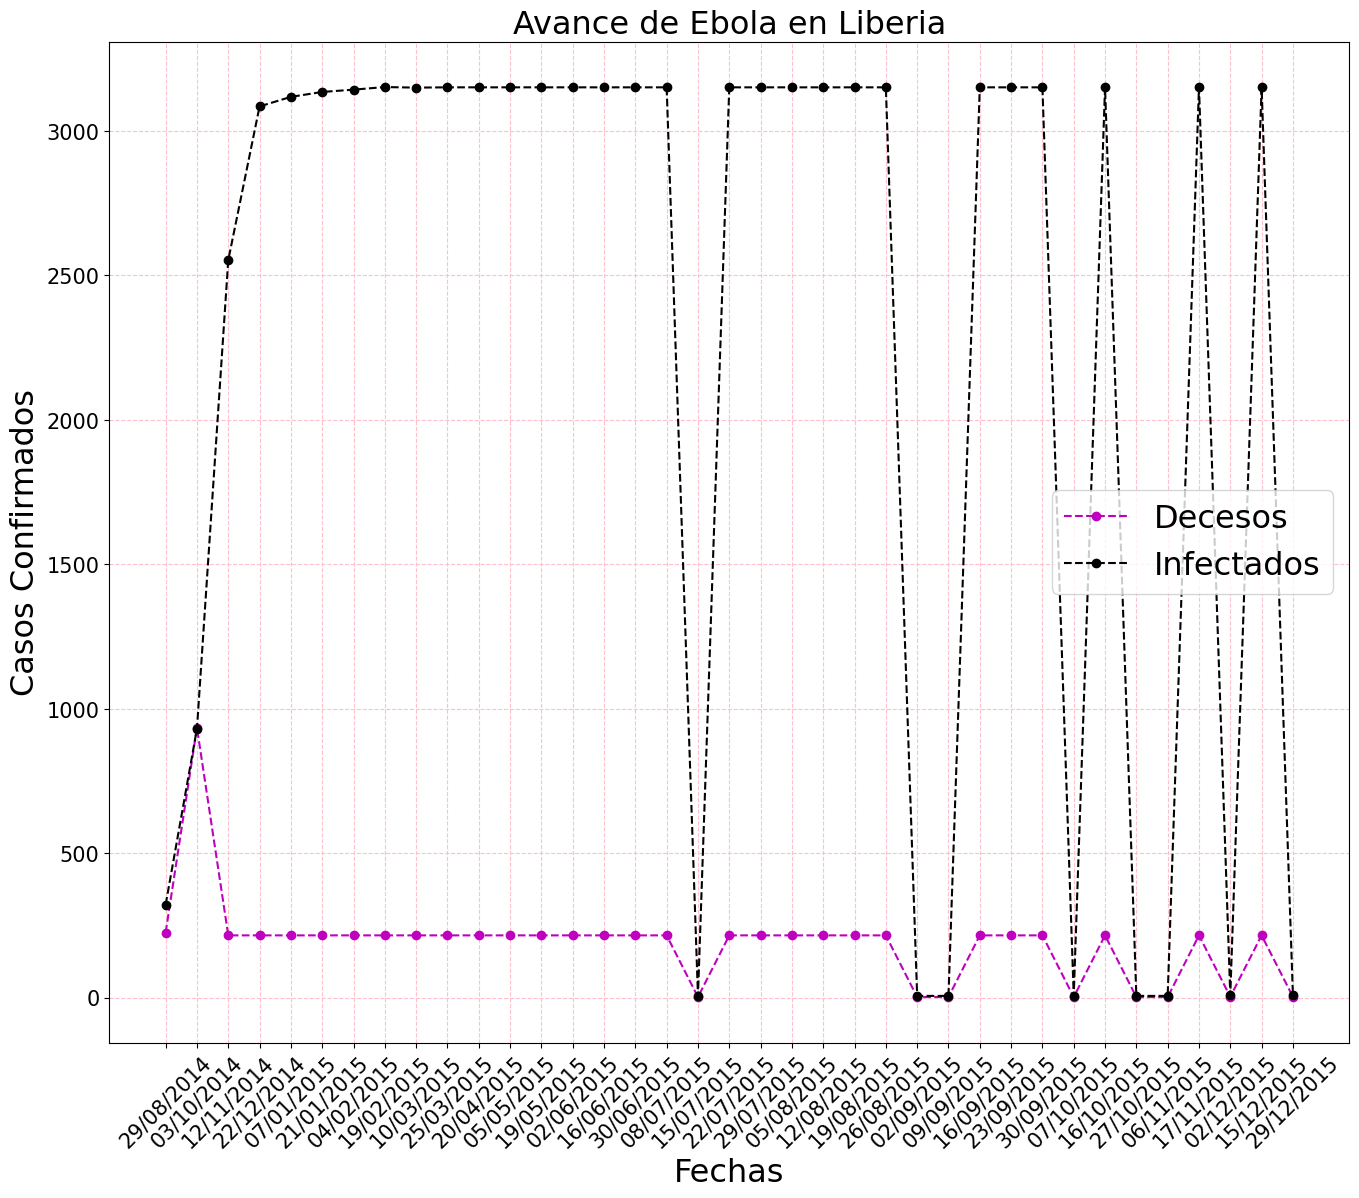

In [70]:
#De esta manera ya podemos graficar los datos pues los datos ya están completos
#Graficaremos las muertes contra los casos confirmados, de esta manera el analísis de cuantas personas se han enfermado y cuantas de ellas han
#muerto será más fácil
Dates=L.index[0:-1:10]
#Tomamos los datos de las muertes confirmadas
Muertes=L["No. of confirmed deaths"][0:-1:10]
#Tomamos los datos de los casos confirmados
Confirmados=L["No. of confirmed cases"][0:-1:10]
#Graficamos los datos
fig=plt.figure(figsize=(16,13))
plt.plot(Dates,Muertes,"o--m",label="Decesos")
plt.plot(Dates,Confirmados,"o--k",label="Infectados")
plt.xticks(rotation=45, fontsize=15)
plt.yticks( fontsize=15)
plt.grid(color="pink",linestyle="--")
plt.title("Avance de Ebola en Liberia",fontsize=23)
plt.ylabel("Casos Confirmados",fontsize=23)
plt.xlabel("Fechas",fontsize=23)
plt.legend(fontsize=23)
plt.savefig("Grafica1.png",dpi=300,format="png")
plt.show()
#Podrá parecer que los datos que aparecen hasta abajo en la gráfica son cero, pero no es así, lo veremos a continuación

In [12]:
#Nos tomamos los datos de las muertes confirmadas
Muertes=L["No. of confirmed deaths"][0:-1:10]
#Creamos una lista en donde se meterán todos los valores para ver que ninguno de ellos es cero
c=[]
for i in Muertes:
  c.append(i)
print(c)
#Creamos un ciclo for que nos ayudara a buscar ceros en la lista anterior, al ejecutar el código nos damos cuenta de que no hay ceros
#Puede parecer que si los hay solo porque hay algunos valores muy pequeños como 1 o 2 o 3
for i in Muertes:
  if i==0:
    print(0)
  else:
    print("No hay ceros")

[225.0, 934.0, 215.496, 215.496, 215.496, 215.496, 215.496, 215.496, 215.496, 215.496, 215.496, 215.496, 215.496, 215.496, 215.496, 215.496, 215.496, 2.0, 215.496, 215.496, 215.496, 215.496, 215.496, 215.496, 2.0, 2.0, 215.496, 215.496, 215.496, 2.0, 215.496, 2.0, 2.0, 215.496, 3.0, 215.496, 3.0]
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros


In [13]:
#Haremos el análisis de manera similar con los casos confirmados
Confirmados=L["No. of confirmed cases"][0:-1:10]
d=[]
for i in Confirmados:
  d.append(i)
print(d)
for i in Confirmados:
  if i==0:
    print(0)
  else:
    print("No hay ceros")
#De esta manera notemos que los datos al igual que en la lista anterior, son valores muy pequeños, por ello parece ser que son ceros
#Pero no lo son

[322, 931, 2553, 3085, 3118, 3135, 3143, 3152, 3150, 3151, 3151, 3151, 3151, 3151, 3151, 3151, 3151, 6, 3151, 3151, 3151, 3151, 3151, 3151, 6, 6, 3151, 3151, 3151, 6, 3151, 6, 6, 3151, 9, 3151, 9]
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros


In [14]:
#Ahora veremos cuántas personas han muerto con un porcentaje donde el 100% son las personas infectadas, haremos el analísis con una regla de tres
PIvsD=(100*L["No. of confirmed deaths"])/L["No. of confirmed cases"]
L["PIvsD"]=PIvsD
L.head()

<ipython-input-14-c15f189323d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L["PIvsD"]=PIvsD


,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female,PIvsD
Date,,,,,,,,,,,,
29/08/2014,Liberia,322,225.0,193.2,128.8,57.96,38.64,115.92,77.28,19.32,12.88,69.875776
05/09/2014,Liberia,614,431.0,368.4,245.6,110.52,73.68,221.04,147.36,36.84,24.56,70.195440
08/09/2014,Liberia,634,508.0,380.4,253.6,114.12,76.08,228.24,152.16,38.04,25.36,80.126183
12/09/2014,Liberia,654,498.0,392.4,261.6,117.72,78.48,235.44,156.96,39.24,26.16,76.146789
16/09/2014,Liberia,790,563.0,474.0,316.0,142.20,94.80,284.40,189.60,47.40,31.60,71.265823


In [15]:
#De esta manera podemos ver cuántas personas se han recuperado, igual con una regla de tres, de la siguiente manera
Porcentaje_recuperados=100-PIvsD
recuperados=(Porcentaje_recuperados*L["No. of confirmed cases"])/100
L["recuperados"]=recuperados
L["Porcentaje_recuperados"]=Porcentaje_recuperados
L

plt.savefig("Porcentaje recuperadosL.png",dpi=30,format="png")

<ipython-input-15-9a89776e3412>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L["recuperados"]=recuperados
<ipython-input-15-9a89776e3412>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L["Porcentaje_recuperados"]=Porcentaje_recuperados


<Figure size 640x480 with 0 Axes>

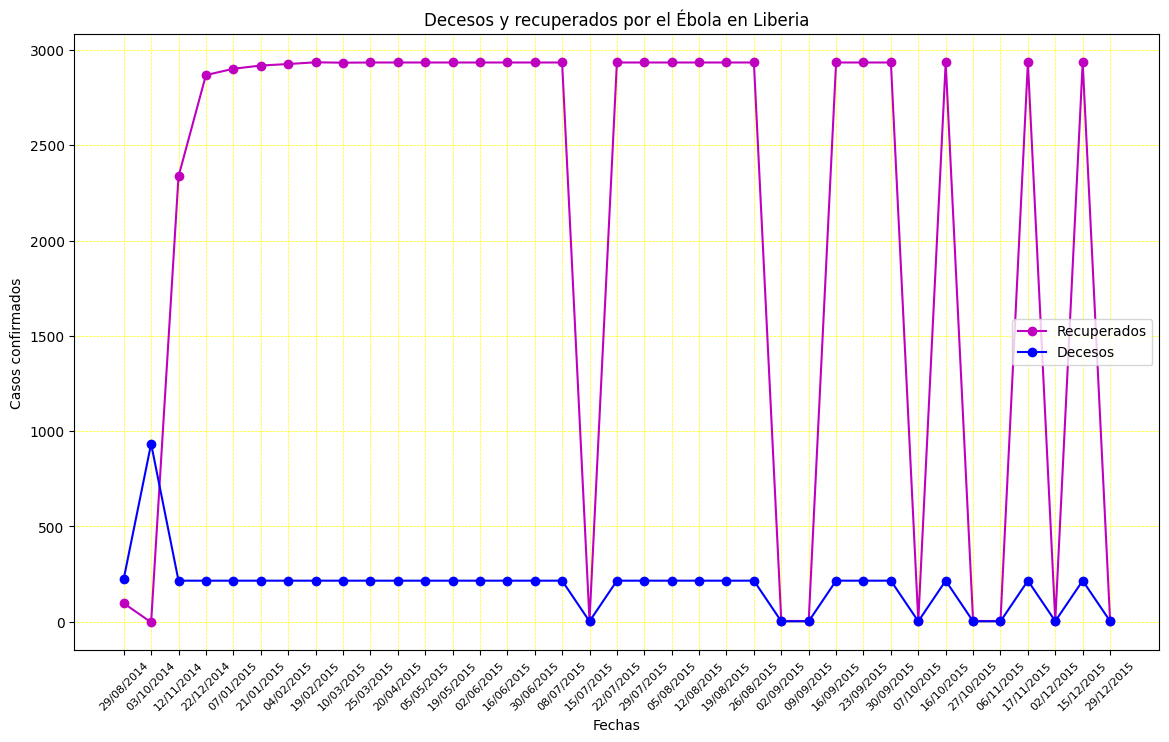

In [47]:
#Ahora analicemos las muertes y los recuperados en una gráfica
recuperados=L["recuperados"][0:-1:10]
fig=plt.figure(figsize=(14,8))
plt.plot(Dates,recuperados,"o-m", ms = 6,label="Recuperados")
plt.plot(Dates,Muertes,"o-b",ms=6,label="Decesos")
plt.grid(color = "yellow", linestyle = "--", linewidth = 0.5)
plt.title("Decesos y recuperados por el Ébola en Liberia")
plt.ylabel("Casos confirmados")
plt.xlabel("Fechas")
plt.xticks(rotation=45,fontsize=8)
plt.legend()
plt.savefig("Grafica2.png",dpi=300,format="png")
plt.show()

In [16]:
#Notemos que no hay ceros tampoco en los recuperados, solo datos muy pequeños
recuperados=L["recuperados"][0:-1:10]
d=[]
for i in recuperados:
  d.append(i)
print(d)
for i in recuperados:
  if i==0:
    print(0)
  else:
    print("No hay ceros")

[97.00000000000001, -3.000000000000042, 2337.504, 2869.5039999999995, 2902.5040000000004, 2919.5039999999995, 2927.5039999999995, 2936.5040000000004, 2934.5040000000004, 2935.5040000000004, 2935.5040000000004, 2935.5040000000004, 2935.5040000000004, 2935.5040000000004, 2935.5040000000004, 2935.5040000000004, 2935.5040000000004, 3.9999999999999996, 2935.5040000000004, 2935.5040000000004, 2935.5040000000004, 2935.5040000000004, 2935.5040000000004, 2935.5040000000004, 3.9999999999999996, 3.9999999999999996, 2935.5040000000004, 2935.5040000000004, 2935.5040000000004, 3.9999999999999996, 2935.5040000000004, 3.9999999999999996, 3.9999999999999996, 2935.5040000000004, 5.999999999999999, 2935.5040000000004, 5.999999999999999]
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros

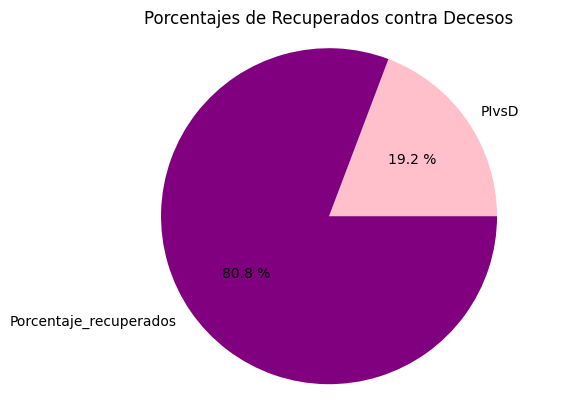

In [29]:
#Ahora analizamos los porcentajes de los recuerados contra decesos en una gráfica de pastel
PIvsD_mean=L["PIvsD"].mean()
Porcentaje_recuperados_mean=L["Porcentaje_recuperados"].mean()
etiquetas=["PIvsD","Porcentaje_recuperados"]
porcentajes=[PIvsD_mean,Porcentaje_recuperados_mean]
plt.pie(porcentajes,labels=etiquetas,autopct="%0.1f %%",colors=["pink","purple"])
plt.axis("equal")
plt.title("Porcentajes de Recuperados contra Decesos")
plt.savefig("Grafica3.png",dpi=300,format="png")
plt.show()

In [18]:
#Ahora sacaremos el porcentaje de mujeres infectadas y el de los hombres infectados para ver quien se enfermó más
#Porcentaje de mujeres infectadas
PFC=(100*L["Female Cases"])/L["No. of confirmed cases"]
L["PFC"]=PFC
L.head()

<ipython-input-18-620c5bf75f92>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L["PFC"]=PFC


,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female,PIvsD,recuperados,Porcentaje_recuperados,PFC
Date,,,,,,,,,,,,,,,
29/08/2014,Liberia,322,225.0,193.2,128.8,57.96,38.64,115.92,77.28,19.32,12.88,69.875776,97.0,30.124224,40.0
05/09/2014,Liberia,614,431.0,368.4,245.6,110.52,73.68,221.04,147.36,36.84,24.56,70.195440,183.0,29.804560,40.0
08/09/2014,Liberia,634,508.0,380.4,253.6,114.12,76.08,228.24,152.16,38.04,25.36,80.126183,126.0,19.873817,40.0
12/09/2014,Liberia,654,498.0,392.4,261.6,117.72,78.48,235.44,156.96,39.24,26.16,76.146789,156.0,23.853211,40.0
16/09/2014,Liberia,790,563.0,474.0,316.0,142.20,94.80,284.40,189.60,47.40,31.60,71.265823,227.0,28.734177,40.0


In [19]:
#Porcentaje de hombres infectados
PMC=(100*L["Male Cases"])/L["No. of confirmed cases"]
L["PMC"]=PMC
L.head()

<ipython-input-19-386868f430b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L["PMC"]=PMC


,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female,PIvsD,recuperados,Porcentaje_recuperados,PFC,PMC
Date,,,,,,,,,,,,,,,,
29/08/2014,Liberia,322,225.0,193.2,128.8,57.96,38.64,115.92,77.28,19.32,12.88,69.875776,97.0,30.124224,40.0,60.0
05/09/2014,Liberia,614,431.0,368.4,245.6,110.52,73.68,221.04,147.36,36.84,24.56,70.195440,183.0,29.804560,40.0,60.0
08/09/2014,Liberia,634,508.0,380.4,253.6,114.12,76.08,228.24,152.16,38.04,25.36,80.126183,126.0,19.873817,40.0,60.0
12/09/2014,Liberia,654,498.0,392.4,261.6,117.72,78.48,235.44,156.96,39.24,26.16,76.146789,156.0,23.853211,40.0,60.0
16/09/2014,Liberia,790,563.0,474.0,316.0,142.20,94.80,284.40,189.60,47.40,31.60,71.265823,227.0,28.734177,40.0,60.0


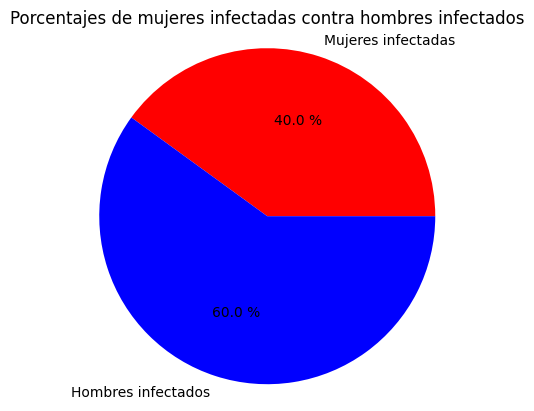

In [50]:
#Ahora analizaremos los porcentajes de las mujeres contra los hombres
PFC_mean=L["PFC"].mean()
PMC_mean=L["PMC"].mean()
etiquetas=["Mujeres infectadas","Hombres infectados"]
porcentajes=[PFC_mean,PMC_mean]
plt.pie(porcentajes,labels=etiquetas,autopct="%0.1f %%",colors=["red","blue"])
plt.axis("equal")
plt.title("Porcentajes de mujeres infectadas contra hombres infectados")
plt.savefig("Grafica4.png",dpi=300,format="png")
plt.show()

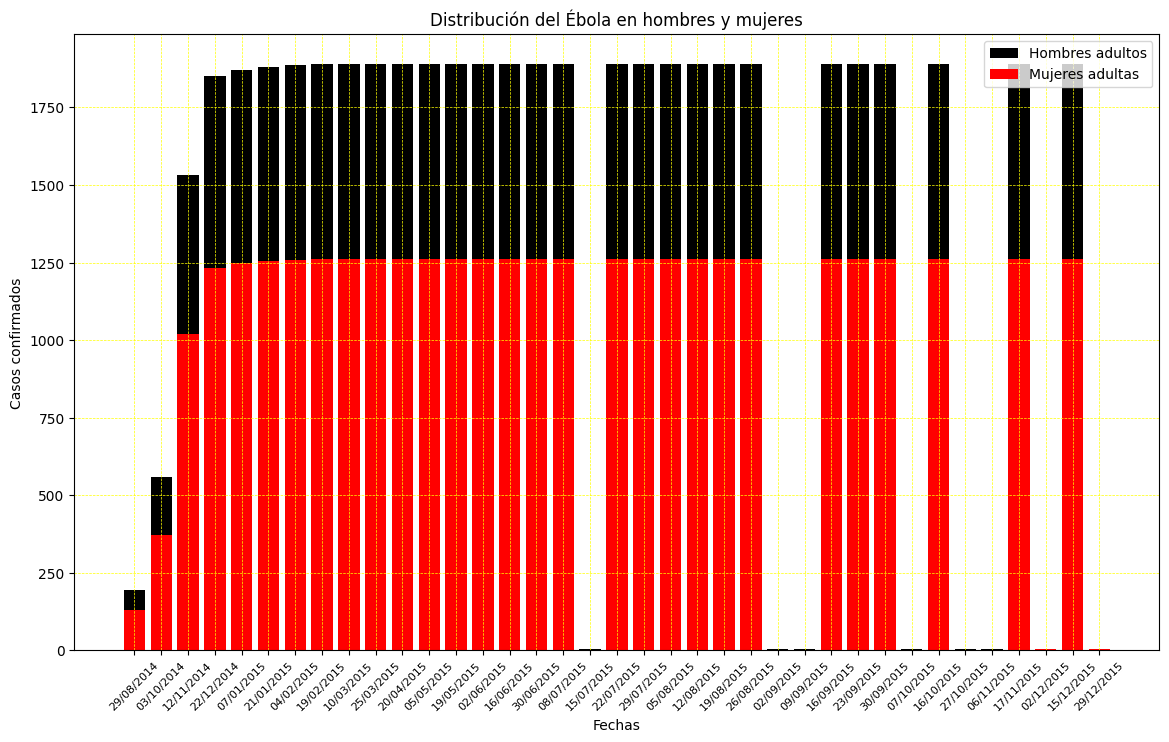

In [49]:
#Así mismo analizaremos la gráfica de los casos de mujeres contra hombres
FC=L["Female Cases"][0:-1:10]
MC=L["Male Cases"][0:-1:10]
Dates=L.index[0:-1:10]
fig=plt.figure(figsize=(14,8))
plt.bar(Dates,MC,color="black",label="Hombres adultos")
plt.bar(Dates,FC,color="red",label="Mujeres adultas")
plt.xticks(rotation=45,fontsize=8)
plt.grid(color = "yellow", linestyle = "--", linewidth = 0.5)
plt.title("Distribución del Ébola en hombres y mujeres")
plt.ylabel("Casos confirmados")
plt.xlabel("Fechas")
plt.legend()
plt.savefig("Grafica5.png",dpi=300,format="png")

plt.show()

In [ ]:
#Notemos que tampoco hay ceros en los casos de los hombres y de las mujeres, solo valores muy pequeños
FC=L["Female Cases"][0:-1:10]
d=[]
for i in FC:
  d.append(i)
print(d)
for i in FC:
  if i==0:
    print(0)
  else:
    print("No hay ceros")

[128.8, 372.4, 1021.2, 1234.0, 1247.2, 1254.0, 1257.2, 1260.8, 1260.0, 1260.4, 1260.4, 1260.4, 1260.4, 1260.4, 1260.4, 1260.4, 1260.4, 2.4, 1260.4, 1260.4, 1260.4, 1260.4, 1260.4, 1260.4, 2.4, 2.4, 1260.4, 1260.4, 1260.4, 2.4, 1260.4, 2.4, 2.4, 1260.4, 3.6, 1260.4, 3.6]
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros


In [ ]:
MC=L["Male Cases"][0:-1:10]
d=[]
for i in MC:
  d.append(i)
print(d)
for i in MC:
  if i==0:
    print(0)
  else:
    print("No hay ceros")

[193.2, 558.6, 1531.8, 1851.0, 1870.8, 1881.0, 1885.8, 1891.2, 1890.0, 1890.6, 1890.6, 1890.6, 1890.6, 1890.6, 1890.6, 1890.6, 1890.6, 3.6, 1890.6, 1890.6, 1890.6, 1890.6, 1890.6, 1890.6, 3.6, 3.6, 1890.6, 1890.6, 1890.6, 3.6, 1890.6, 3.6, 3.6, 1890.6, 5.4, 1890.6, 5.4]
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros
No hay ceros


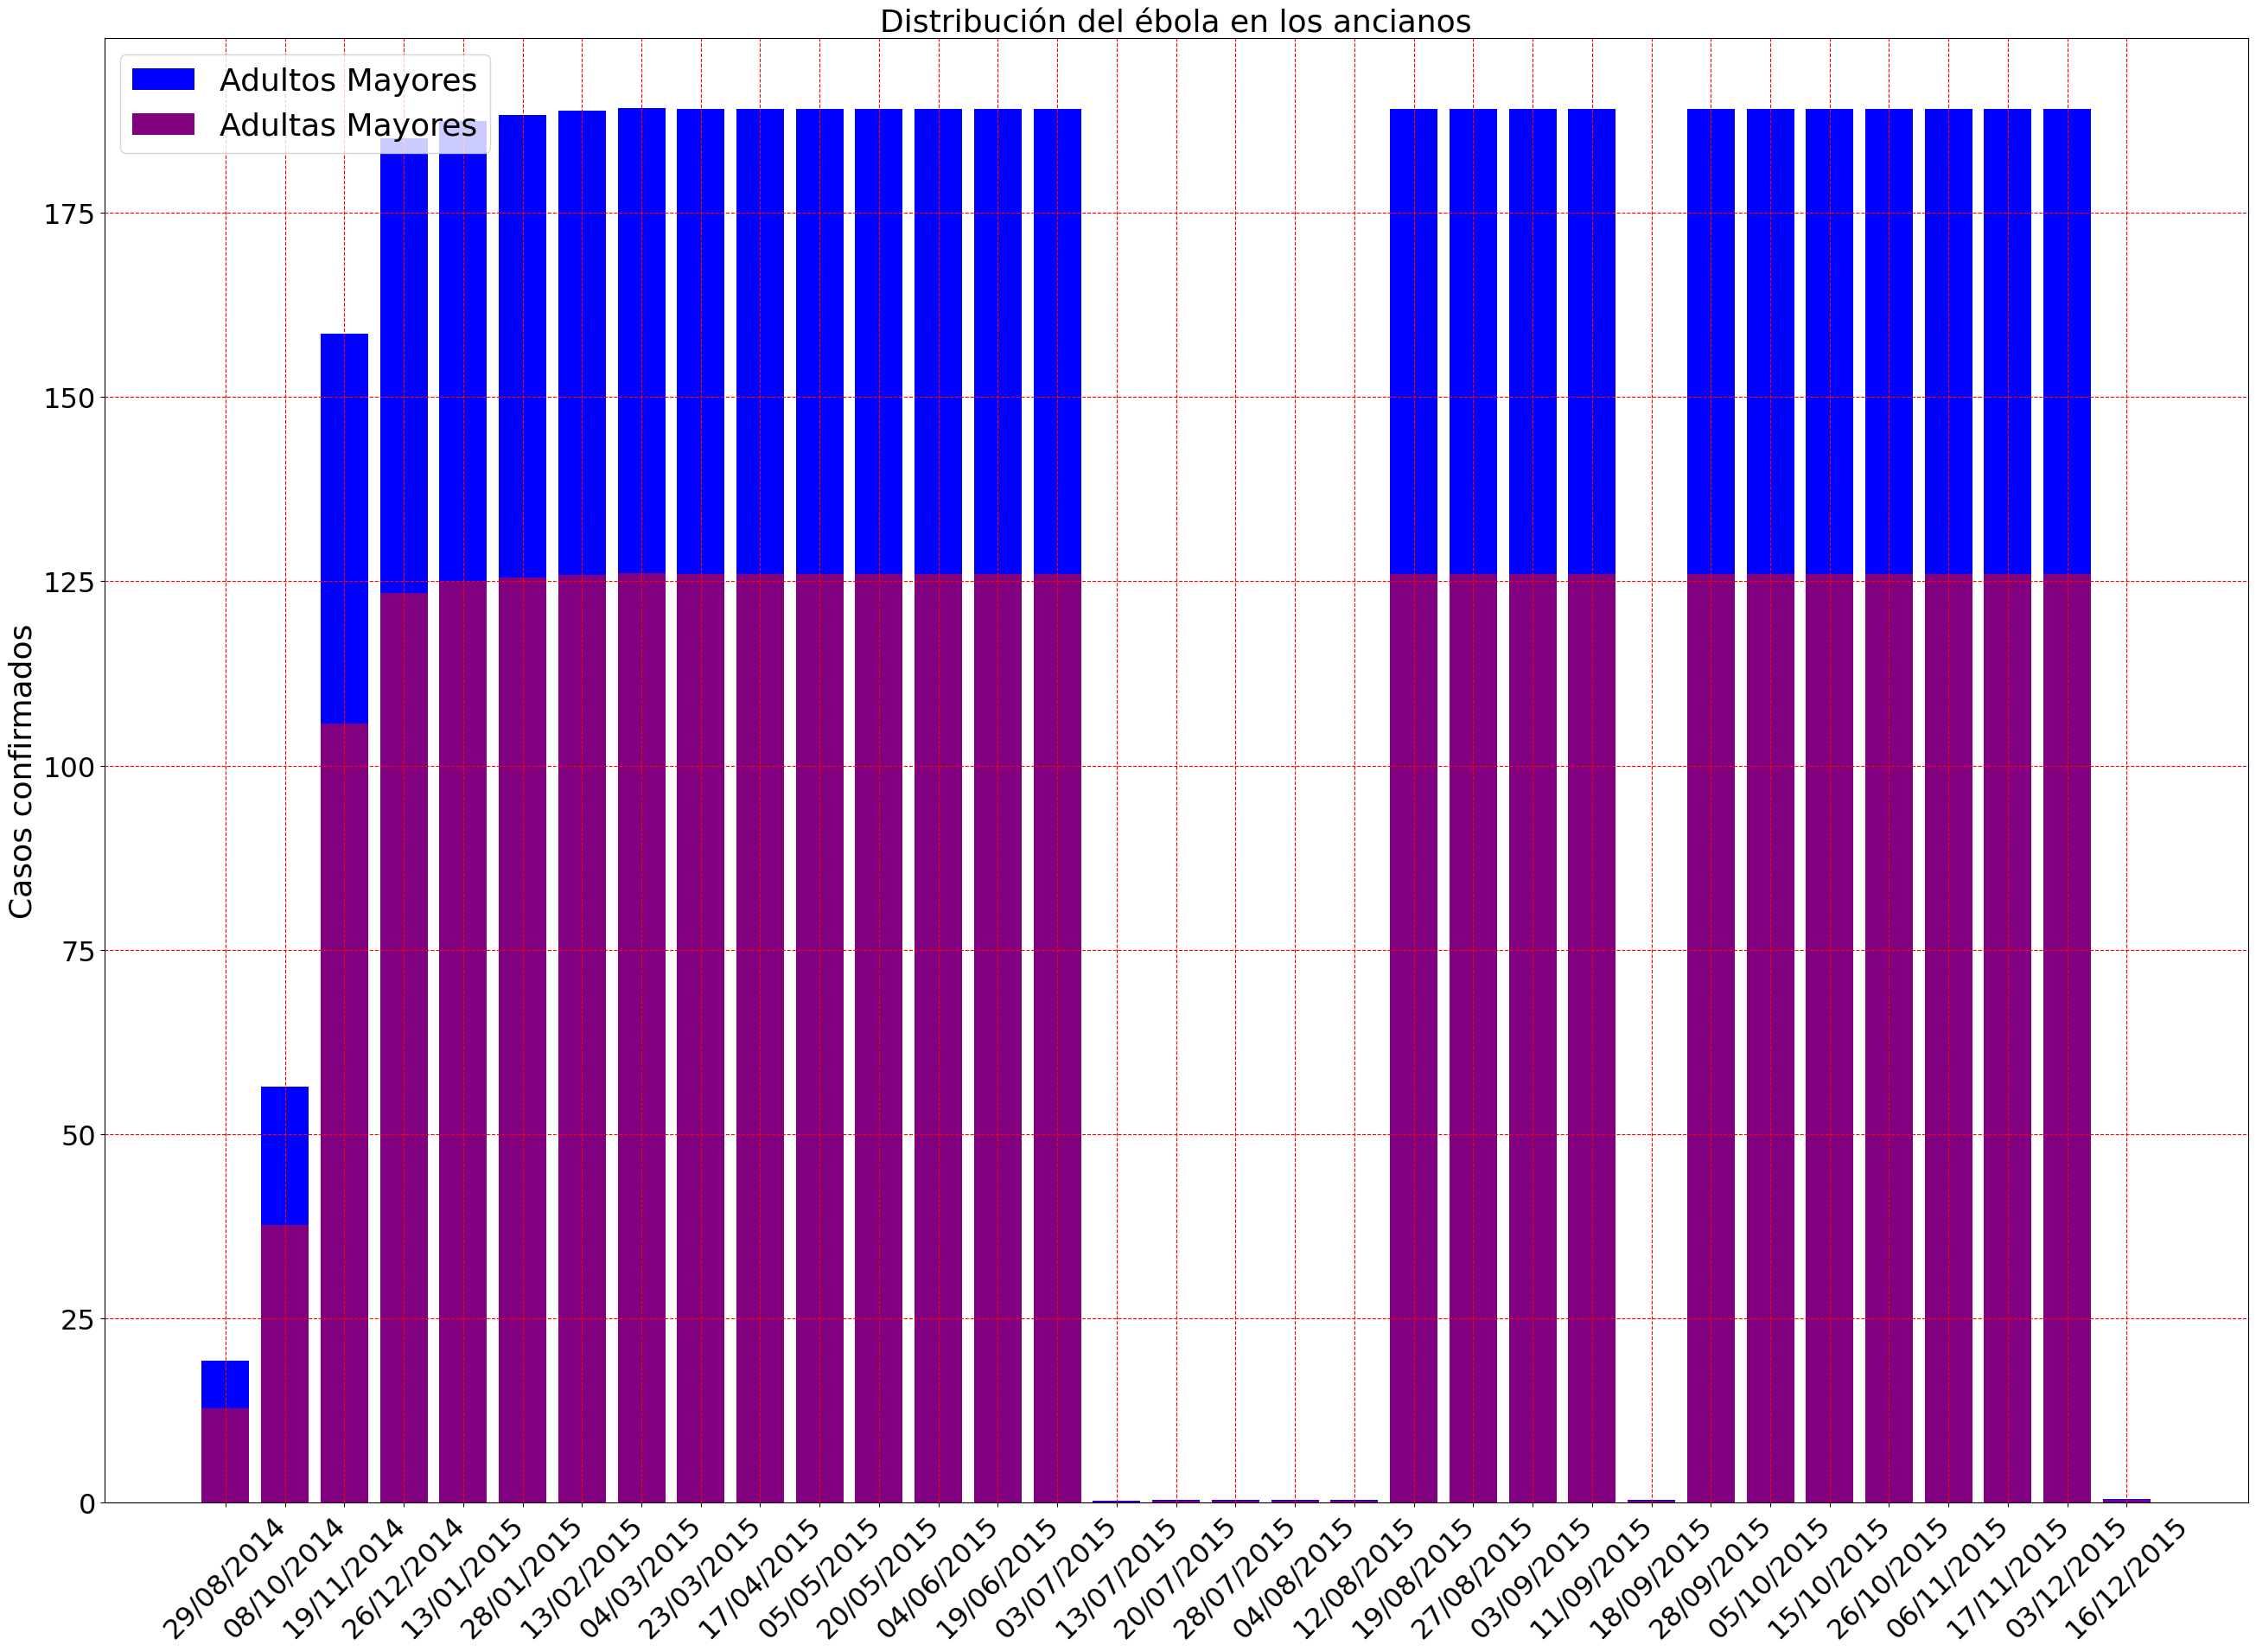

In [88]:
#Ahora con una gráfica de barras analizaremos quien se ha infectado más, si los adultos mayores o las adultas mayores
OF=L["Old Female"][0:-1:11]
Dates=L.index[0:-1:11]
OM=L["Old Male"][0:-1:11]
fig=plt.figure(figsize=(32,22))
plt.bar(Dates,OM,color="blue",label="Adultos Mayores")
plt.bar(Dates,OF,color="purple",label="Adultas Mayores")
plt.grid(color="red",linestyle="--")
plt.title("Distribución del ébola en los ancianos",fontsize=26)
plt.ylabel("Casos confirmados",fontsize=26)
plt.xticks(rotation=45,fontsize=23)
plt.yticks(fontsize=23)
plt.legend(fontsize=26)
plt.savefig("FemaleL.png",dpi=300,format="png")
plt.show()

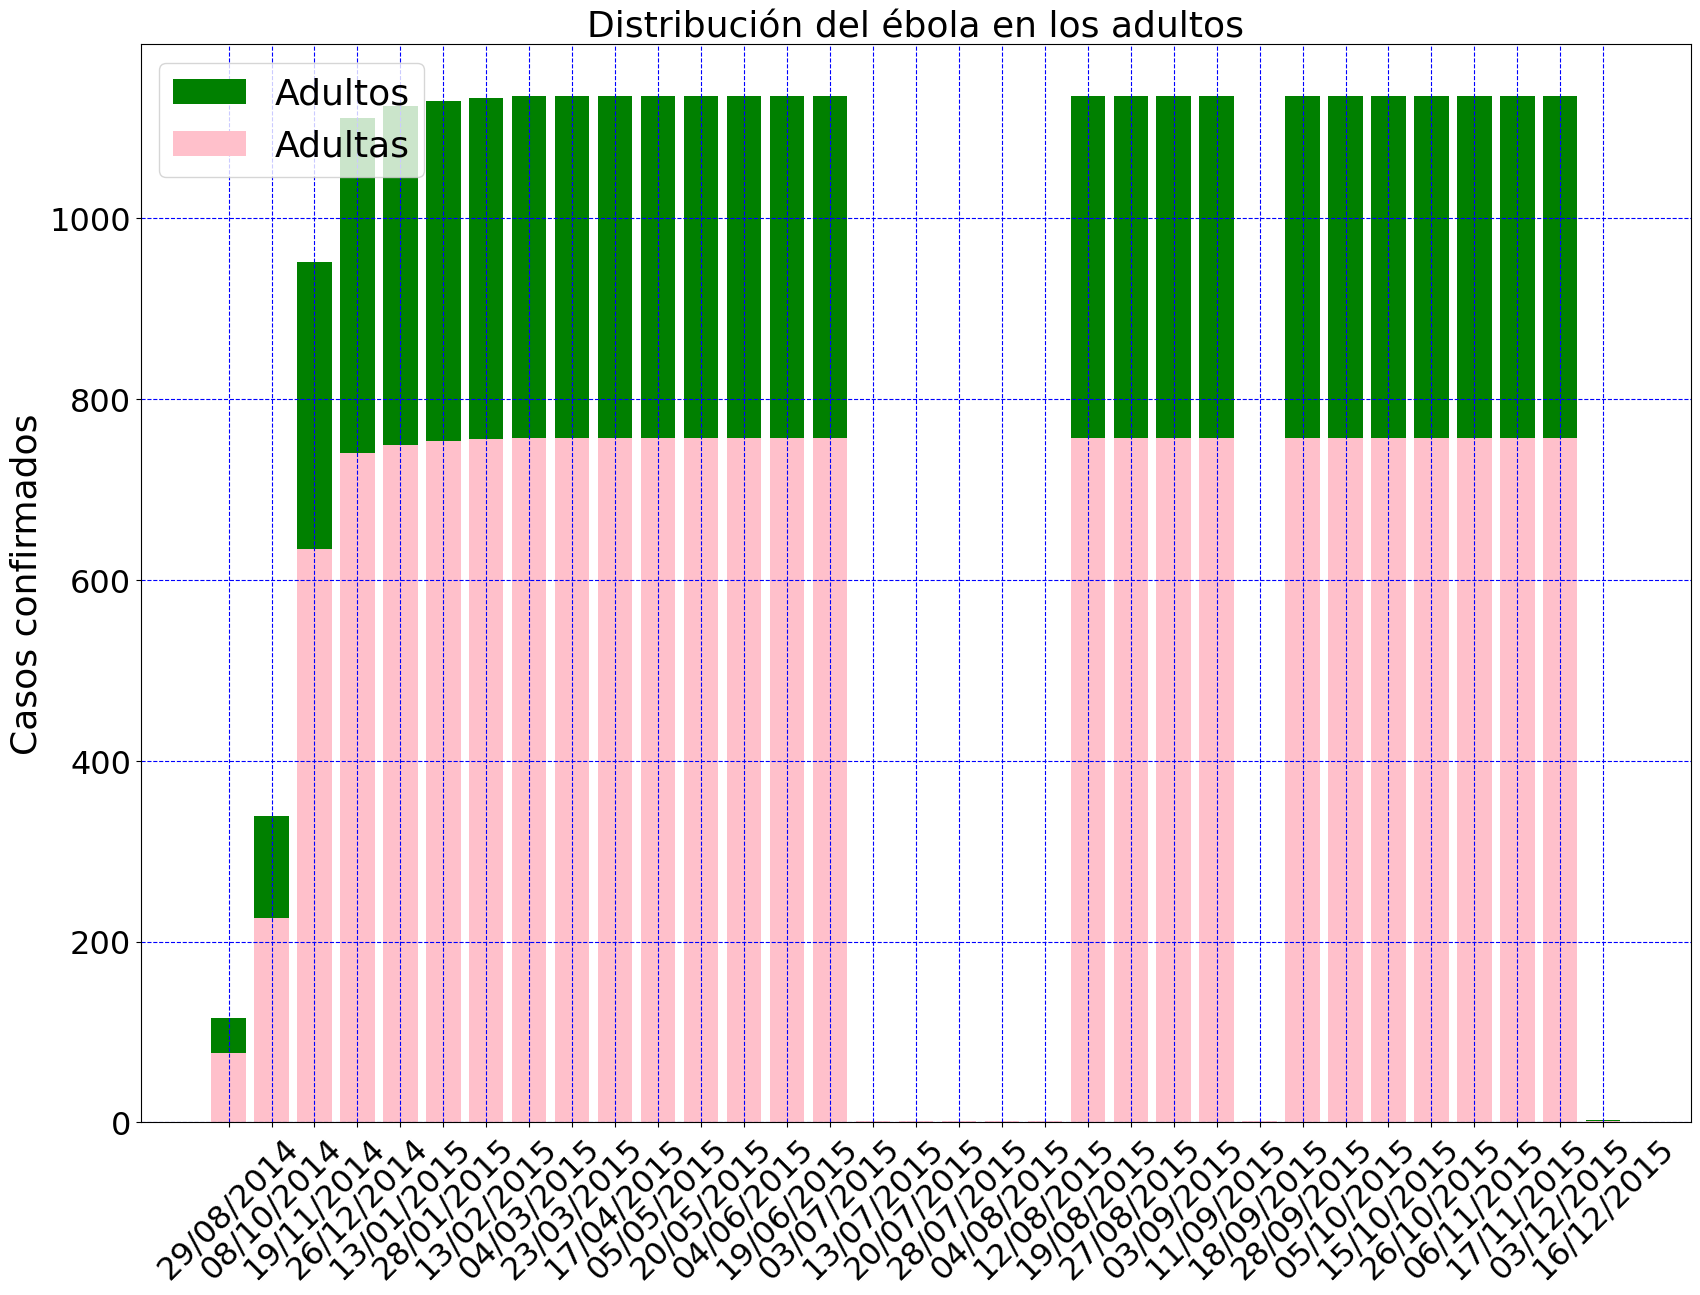

In [87]:
#De misma forma con los adultos
AF=L["Adult Female"][0:-1:11]
Dates=L.index[0:-1:11]
AM=L["Adult Male"][0:-1:11]
fig=plt.figure(figsize=(20,14))
plt.bar(Dates,AM,color="green",label="Adultos")
plt.bar(Dates,AF,color="pink",label="Adultas")
plt.grid(color="blue",linestyle="--")
plt.title("Distribución del ébola en los adultos",fontsize=26)
plt.ylabel("Casos confirmados",fontsize=26)
plt.xticks(rotation=45,fontsize=23)
plt.yticks(fontsize=23)
plt.legend(fontsize=26)
plt.savefig("Adult_FemaleL.png",dpi=300,format="png")
plt.show()

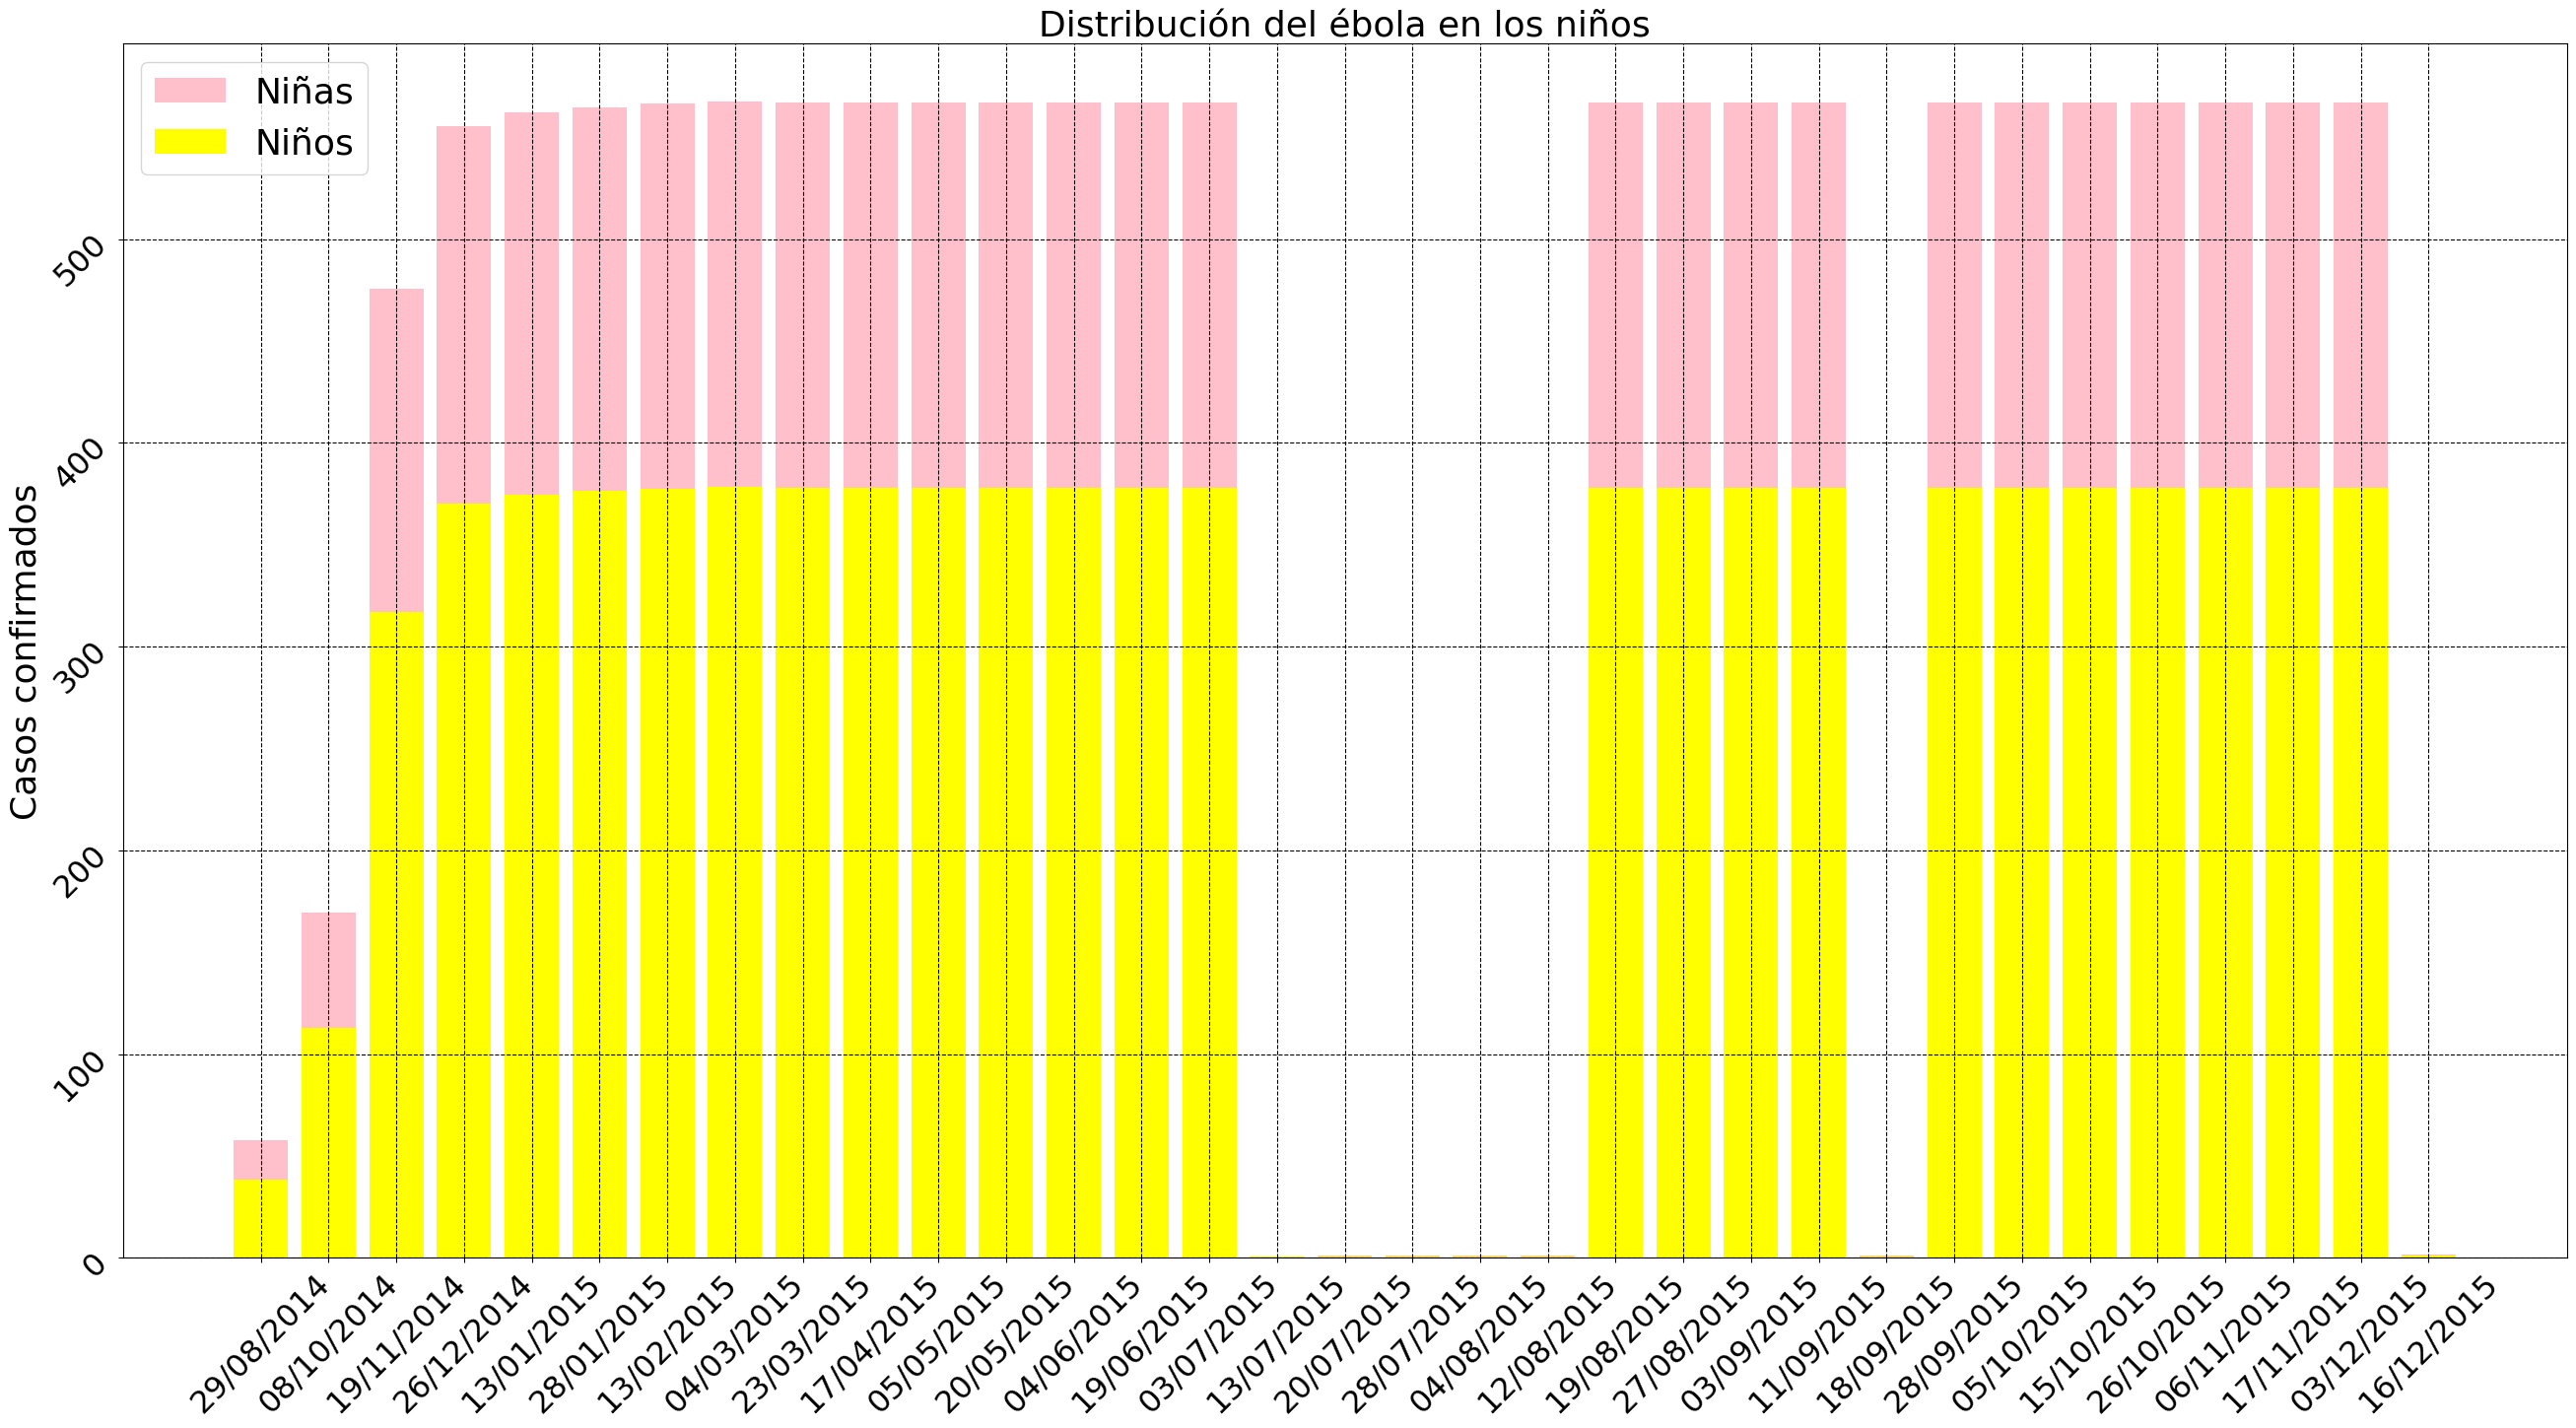

In [89]:
#De misma forma hagamos el análisis con los niños y niñas
NF=L["Girls"][0:-1:11]
Dates=L.index[0:-1:11]
NM=L["Boys"][0:-1:11]
fig=plt.figure(figsize=(32,16))
plt.bar(Dates,NM,color="pink",label="Niñas")
plt.bar(Dates,NF,color="yellow",label="Niños")

plt.grid(color="black",linestyle="--")
plt.title("Distribución del ébola en los niños",fontsize=26)
plt.ylabel("Casos confirmados",fontsize=26)
plt.xticks(rotation=45,fontsize=23)
plt.yticks(rotation=45,fontsize=23)
plt.legend(fontsize=26)
plt.savefig("GirlsL.png",dpi=300,format="png")
plt.show()

In [34]:
#Ahora analicemos los porcentajes de las mujeres adultas, adultas mayores y niñas
POF=(100*L["Old Female"])/L["No. of confirmed cases"]
L["POF"]=POF
L.head()

<ipython-input-34-f22fca8c9532>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L["POF"]=POF


,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female,PIvsD,recuperados,Porcentaje_recuperados,PFC,PMC,POF
Date,,,,,,,,,,,,,,,,,
29/08/2014,Liberia,322,225.0,193.2,128.8,57.96,38.64,115.92,77.28,19.32,12.88,69.875776,97.0,30.124224,40.0,60.0,4.0
05/09/2014,Liberia,614,431.0,368.4,245.6,110.52,73.68,221.04,147.36,36.84,24.56,70.195440,183.0,29.804560,40.0,60.0,4.0
08/09/2014,Liberia,634,508.0,380.4,253.6,114.12,76.08,228.24,152.16,38.04,25.36,80.126183,126.0,19.873817,40.0,60.0,4.0
12/09/2014,Liberia,654,498.0,392.4,261.6,117.72,78.48,235.44,156.96,39.24,26.16,76.146789,156.0,23.853211,40.0,60.0,4.0
16/09/2014,Liberia,790,563.0,474.0,316.0,142.20,94.80,284.40,189.60,47.40,31.60,71.265823,227.0,28.734177,40.0,60.0,4.0


In [35]:
PG=(100*L["Girls"])/L["No. of confirmed cases"]
L["PG"]=PG
L.head()

<ipython-input-35-b5520201a37e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L["PG"]=PG


,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female,PIvsD,recuperados,Porcentaje_recuperados,PFC,PMC,POF,PG
Date,,,,,,,,,,,,,,,,,,
29/08/2014,Liberia,322,225.0,193.2,128.8,57.96,38.64,115.92,77.28,19.32,12.88,69.875776,97.0,30.124224,40.0,60.0,4.0,12.0
05/09/2014,Liberia,614,431.0,368.4,245.6,110.52,73.68,221.04,147.36,36.84,24.56,70.195440,183.0,29.804560,40.0,60.0,4.0,12.0
08/09/2014,Liberia,634,508.0,380.4,253.6,114.12,76.08,228.24,152.16,38.04,25.36,80.126183,126.0,19.873817,40.0,60.0,4.0,12.0
12/09/2014,Liberia,654,498.0,392.4,261.6,117.72,78.48,235.44,156.96,39.24,26.16,76.146789,156.0,23.853211,40.0,60.0,4.0,12.0
16/09/2014,Liberia,790,563.0,474.0,316.0,142.20,94.80,284.40,189.60,47.40,31.60,71.265823,227.0,28.734177,40.0,60.0,4.0,12.0


In [36]:
PAF=(100*L["Adult Female"])/L["No. of confirmed cases"]
L["PAF"]=PAF
L.head()

<ipython-input-36-904c3e41e73e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L["PAF"]=PAF


,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female,PIvsD,recuperados,Porcentaje_recuperados,PFC,PMC,POF,PG,PAF
Date,,,,,,,,,,,,,,,,,,,
29/08/2014,Liberia,322,225.0,193.2,128.8,57.96,38.64,115.92,77.28,19.32,12.88,69.875776,97.0,30.124224,40.0,60.0,4.0,12.0,24.0
05/09/2014,Liberia,614,431.0,368.4,245.6,110.52,73.68,221.04,147.36,36.84,24.56,70.195440,183.0,29.804560,40.0,60.0,4.0,12.0,24.0
08/09/2014,Liberia,634,508.0,380.4,253.6,114.12,76.08,228.24,152.16,38.04,25.36,80.126183,126.0,19.873817,40.0,60.0,4.0,12.0,24.0
12/09/2014,Liberia,654,498.0,392.4,261.6,117.72,78.48,235.44,156.96,39.24,26.16,76.146789,156.0,23.853211,40.0,60.0,4.0,12.0,24.0
16/09/2014,Liberia,790,563.0,474.0,316.0,142.20,94.80,284.40,189.60,47.40,31.60,71.265823,227.0,28.734177,40.0,60.0,4.0,12.0,24.0


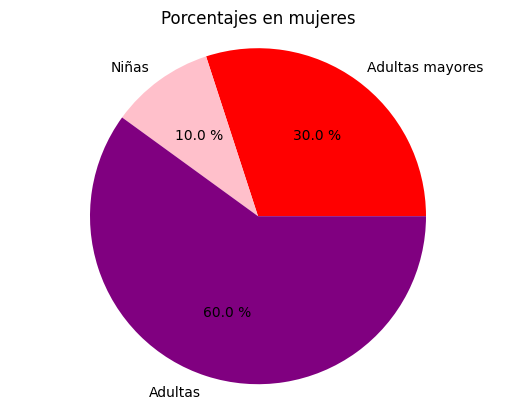

In [37]:
POF_mean=L["POF"].mean()
PG_mean=L["PG"].mean()
PAF_mean=L["PAF"].mean()
etiquetas=["Adultas mayores","Niñas","Adultas"]
porcentajes=[PG_mean,POF_mean,PAF_mean]
plt.pie(porcentajes,labels=etiquetas,autopct="%0.1f %%",colors=["red","pink","purple"])
plt.axis("equal")
plt.title("Porcentajes en mujeres")
plt.savefig("Grafica6.png",dpi=300,format="png")
plt.show()

In [38]:
#Haremos el mismo análisis con los hombres
POM=(100*L["Old Male"])/L["No. of confirmed cases"]
L["POM"]=POM
L.head()

<ipython-input-38-3fbe87bb4e3c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L["POM"]=POM


,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female,PIvsD,recuperados,Porcentaje_recuperados,PFC,PMC,POF,PG,PAF,POM
Date,,,,,,,,,,,,,,,,,,,,
29/08/2014,Liberia,322,225.0,193.2,128.8,57.96,38.64,115.92,77.28,19.32,12.88,69.875776,97.0,30.124224,40.0,60.0,4.0,12.0,24.0,6.0
05/09/2014,Liberia,614,431.0,368.4,245.6,110.52,73.68,221.04,147.36,36.84,24.56,70.195440,183.0,29.804560,40.0,60.0,4.0,12.0,24.0,6.0
08/09/2014,Liberia,634,508.0,380.4,253.6,114.12,76.08,228.24,152.16,38.04,25.36,80.126183,126.0,19.873817,40.0,60.0,4.0,12.0,24.0,6.0
12/09/2014,Liberia,654,498.0,392.4,261.6,117.72,78.48,235.44,156.96,39.24,26.16,76.146789,156.0,23.853211,40.0,60.0,4.0,12.0,24.0,6.0
16/09/2014,Liberia,790,563.0,474.0,316.0,142.20,94.80,284.40,189.60,47.40,31.60,71.265823,227.0,28.734177,40.0,60.0,4.0,12.0,24.0,6.0


In [39]:
PB=(100*L["Boys"])/L["No. of confirmed cases"]
L["PB"]=PB
L.head()

<ipython-input-39-9fb991ad6eaa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L["PB"]=PB


,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,...,PIvsD,recuperados,Porcentaje_recuperados,PFC,PMC,POF,PG,PAF,POM,PB
Date,,,,,,,,,,,,,,,,,,,,,
29/08/2014,Liberia,322,225.0,193.2,128.8,57.96,38.64,115.92,77.28,19.32,...,69.875776,97.0,30.124224,40.0,60.0,4.0,12.0,24.0,6.0,18.0
05/09/2014,Liberia,614,431.0,368.4,245.6,110.52,73.68,221.04,147.36,36.84,...,70.195440,183.0,29.804560,40.0,60.0,4.0,12.0,24.0,6.0,18.0
08/09/2014,Liberia,634,508.0,380.4,253.6,114.12,76.08,228.24,152.16,38.04,...,80.126183,126.0,19.873817,40.0,60.0,4.0,12.0,24.0,6.0,18.0
12/09/2014,Liberia,654,498.0,392.4,261.6,117.72,78.48,235.44,156.96,39.24,...,76.146789,156.0,23.853211,40.0,60.0,4.0,12.0,24.0,6.0,18.0
16/09/2014,Liberia,790,563.0,474.0,316.0,142.20,94.80,284.40,189.60,47.40,...,71.265823,227.0,28.734177,40.0,60.0,4.0,12.0,24.0,6.0,18.0


In [40]:
PAM=(100*L["Adult Male"])/L["No. of confirmed cases"]
L["PAM"]=PAM
L

<ipython-input-40-960de4eec8ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L["PAM"]=PAM


,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,...,recuperados,Porcentaje_recuperados,PFC,PMC,POF,PG,PAF,POM,PB,PAM
Date,,,,,,,,,,,,,,,,,,,,,
29/08/2014,Liberia,322,225.000,193.2,128.8,57.96,38.64,115.92,77.28,19.32,...,97.000,30.124224,40.0,60.0,4.0,12.0,24.0,6.0,18.0,36.0
05/09/2014,Liberia,614,431.000,368.4,245.6,110.52,73.68,221.04,147.36,36.84,...,183.000,29.804560,40.0,60.0,4.0,12.0,24.0,6.0,18.0,36.0
08/09/2014,Liberia,634,508.000,380.4,253.6,114.12,76.08,228.24,152.16,38.04,...,126.000,19.873817,40.0,60.0,4.0,12.0,24.0,6.0,18.0,36.0
12/09/2014,Liberia,654,498.000,392.4,261.6,117.72,78.48,235.44,156.96,39.24,...,156.000,23.853211,40.0,60.0,4.0,12.0,24.0,6.0,18.0,36.0
16/09/2014,Liberia,790,563.000,474.0,316.0,142.20,94.80,284.40,189.60,47.40,...,227.000,28.734177,40.0,60.0,4.0,12.0,24.0,6.0,18.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29/12/2015,Liberia,3151,215.496,1890.6,1260.4,567.18,378.12,1134.36,756.24,189.06,...,2935.504,93.161028,40.0,60.0,4.0,12.0,24.0,6.0,18.0,36.0
29/12/2015,Liberia,9,3.000,5.4,3.6,1.62,1.08,3.24,2.16,0.54,...,6.000,66.666667,40.0,60.0,4.0,12.0,24.0,6.0,18.0,36.0
23/03/2016,Liberia,9,3.000,5.4,3.6,1.62,1.08,3.24,2.16,0.54,...,6.000,66.666667,40.0,60.0,4.0,12.0,24.0,6.0,18.0,36.0


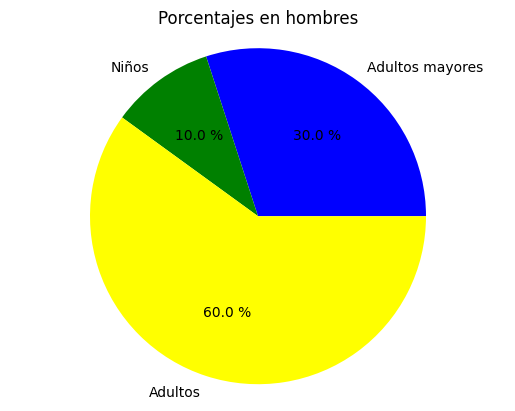

In [41]:
POM_mean=L["POM"].mean()
PB_mean=L["PB"].mean()
PAM_mean=L["PAM"].mean()
etiquetas=["Adultos mayores","Niños","Adultos"]
porcentajes=[PB_mean,POM_mean,PAM_mean]
plt.pie(porcentajes,labels=etiquetas,autopct="%0.1f %%",colors=["blue","green","yellow"])
plt.axis("equal")
plt.title("Porcentajes en hombres")
plt.savefig("Grafica7.png",dpi=300,format="png")
plt.show()